# Подготовка данных

In [224]:
import pandas as pd
import seaborn as sn
import numpy as np
import random
import math
from prettytable import PrettyTable
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [225]:
data = pd.read_csv("/content/drive/MyDrive/ais-datasets/WineDataset.csv")

data

Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280/OD315 of diluted wines  Proline  Wine  
0                            3.92   1065.0     1  
1                            3.40   1050.0     1  
2                            3.17   1185.0     1  
3                            3.45   1480.0     1  
4                            2.93    735.0     1  
..                            ...      ...   ...  
173                          1.74    740.0     3  
174                          1.56    750.0     3  
175                          1.56    835.0     3  
176                          1.62    840.0     3  
177                          1.60    560.0     3  

[178 rows x 14 columns]

# Предварительная обработка данных

## Обработка отсутствующих значений

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic Acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  Wine 

In [227]:
data.shape

(178, 14)

In [228]:
data.isnull().sum()

Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Wine                            0
dtype: int64

Отсутствующих значений не обнаружено

## Разделение датасета на матрицу признаков `X` и вектор зависимых переменных `Y`

In [229]:
X_frame = data.drop('Wine', axis=1)
Y_frame = data['Wine']

In [230]:
X_frame

Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280/OD315 of diluted wines  Proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [231]:
Y_frame

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

## Кодирование категориальных признаков

Не требуется:

In [232]:
X_frame

Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280/OD315 of diluted wines  Proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [233]:
Y_frame

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

## Разделение данных на обучающую и тестовую выборки

In [234]:
# Список индексов данных
indices = list(range(len(X_frame)))

# Размер тестовой выборки
test_size = 0.2 # 20%

# Начальное состояние генератора случайных чисел
random.seed(42)

# Шафлим данные (чтобы потом не балансировать)
random.shuffle(indices)

split_index = int(len(X_frame) * test_size)

X_train = X_frame.iloc[indices[split_index:]]
X_test = X_frame.iloc[indices[:split_index]]
Y_train = Y_frame.iloc[indices[split_index:]]
Y_test = Y_frame.iloc[indices[:split_index]]

Данные после разделения:

In [235]:
X_train.shape

(143, 13)

In [236]:
X_test.shape

(35, 13)

In [237]:
Y_train.shape

(143,)

In [238]:
Y_test.shape

(35,)

## Масштабирование

### Min-max нормализация


#### Обучающей выборки

In [239]:
for column_name, params in X_train.items():
  minimum = min(params)
  maximum = max(params)
  difference = maximum - minimum
  X_train[column_name] = (X_train[column_name] - minimum) / difference

<ipython-input-239-b1d5dde762fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column_name] = (X_train[column_name] - minimum) / difference


#### Тестовой выборки

In [240]:
for column_name, params in X_test.items():
  minimum = min(params)
  maximum = max(params)
  difference = maximum - minimum
  X_test[column_name] = (X_test[column_name] - minimum) / difference

<ipython-input-240-592b6e8dd610>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column_name] = (X_test[column_name] - minimum) / difference


Данные после нормализации:

In [241]:
X_train

Alcohol  Malic Acid       Ash  Alcalinity of ash  Magnesium  \
95   0.309942    0.154150  0.449198           0.469274   1.000000   
79   0.377193    0.618577  0.556150           0.692737   0.336957   
65   0.280702    0.092885  0.641711           0.418994   0.304348   
0    0.824561    0.191700  0.572193           0.279330   0.619565   
113  0.000000    0.000000  0.609626           0.581006   0.195652   
..        ...         ...       ...                ...        ...   
62   0.660819    0.100791  0.299465           0.413408   0.260870   
70   0.257310    0.171937  0.454545           0.547486   0.358696   
6    0.871345    0.223320  0.582888           0.223464   0.282609   
28   0.719298    0.229249  0.770053           0.491620   0.402174   
163  0.453216    0.535573  0.529412           0.441341   0.391304   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
95        0.529617    0.407173                  0.38         0.905063   
79        0.644599    0.466245                  0.60         0.484177   
65        0.501742    0.487342                  0.48         0.525316   
0         0.634146    0.573840                  0.30         0.591772   
113       0.522648    0.352321                  0.58         0.322785   
..             ...         ...                   ...              ...   
62        0.390244    0.305907                  0.38         0.098101   
70        0.041812    0.143460                  0.48         0.329114   
6         0.529617    0.459916                  0.34         0.493671   
28        0.686411    0.554852                  0.48         0.424051   
163       0.142857    0.075949                  0.54         0.164557   

     Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
95          0.126074  0.723404                      0.498168  0.470043  
79          0.123209  0.755319                      0.681319  0.131954  
65          0.317096  0.755319                      0.377289  0.285307  
0           0.416428  0.595745                      0.970696  0.561341  
113         0.171920  0.659574                      0.380952  0.111270  
..               ...       ...                           ...       ...  
62          0.240688  0.797872                      0.435897  0.251070  
70          0.169054  0.453191                      0.201465  0.422254  
6           0.379179  0.574468                      0.846154  0.721826  
28          0.307545  0.819149                      0.780220  0.454351  
163         0.382044  0.212766                      0.175824  0.283167  

[143 rows x 13 columns]

In [242]:
X_test

Alcohol  Malic Acid       Ash  Alcalinity of ash  Magnesium  \
149  0.551075    0.615385  0.348485           0.543011   0.518519   
36   0.604839    0.118681  0.712121           0.220430   0.462963   
15   0.698925    0.156044  0.606061           0.311828   0.500000   
60   0.349462    0.000000  0.287879           0.247312   0.296296   
13   1.000000    0.138462  0.371212           0.000000   0.111111   
144  0.327957    0.610989  0.227273           0.381720   0.500000   
64   0.306452    0.076923  0.477273           0.408602   0.351852   
104  0.397849    0.138462  0.060606           0.489247   0.000000   
105  0.373656    0.318681  0.280303           0.569892   0.092593   
19   0.701613    0.439560  0.500000           0.204301   0.574074   
142  0.669355    0.454945  0.621212           0.650538   0.222222   
42   0.766129    0.173626  0.522727           0.193548   0.296296   
25   0.543011    0.208791  1.000000           0.731183   0.722222   
2    0.572581    0.276923  0.583333           0.387097   0.296296   
115  0.000000    0.090110  0.227273           0.543011   0.000000   
134  0.397849    0.030769  0.265152           0.327957   0.000000   
73   0.526882    0.125275  0.530303           1.000000   1.000000   
158  0.889785    0.127473  0.606061           0.731183   0.240741   
168  0.685484    0.325275  0.598485           0.704301   0.370370   
53   0.736559    0.175824  0.590909           0.306452   0.555556   
128  0.360215    0.116484  0.303030           0.704301   0.055556   
153  0.591398    0.483516  0.287879           0.381720   0.240741   
44   0.543011    0.147253  0.151515           0.301075   0.407407   
30   0.725806    0.087912  0.606061           0.596774   0.296296   
52   0.750000    0.142857  0.393939           0.139785   0.481481   
61   0.432796    0.057143  0.090909           0.290323   0.277778   
137  0.403226    0.969231  0.560606           0.731183   0.203704   
140  0.510753    0.375824  0.606061           0.516129   0.203704   
127  0.204301    0.226374  0.666667           0.919355   0.129630   
173  0.720430    1.000000  0.416667           0.489247   0.185185   
101  0.422043    0.052747  0.000000           0.381720   0.055556   
172  0.841398    0.309890  0.439394           0.462366   0.111111   
174  0.637097    0.617582  0.439394           0.623656   0.314815   
120  0.112903    0.285714  0.393939           0.462366   0.203704   
131  0.497312    0.415385  0.378788           0.462366   0.351852   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
149       0.042636    0.274691              0.346939         0.304167   
36        0.503876    0.672840              0.346939         0.395833   
15        0.600775    0.743827              0.265306         0.437500   
60        0.290698    0.182099              0.938776         0.000000   
13        0.697674    0.984568              0.530612         1.000000   
144       0.031008    0.086420              0.244898         0.304167   
64        0.228682    0.385802              0.571429         0.258333   
104       0.348837    0.438272              0.306122         0.445833   
105       0.147287    0.413580              1.000000         0.420833   
19        0.542636    0.780864              0.000000         0.520833   
142       0.096899    0.006173              0.673469         0.058333   
42        0.755814    0.944444              0.000000         0.537500   
25        0.515504    0.672840              0.612245         0.629167   
2         0.581395    0.845679              0.265306         1.000000   
115       0.449612    0.515432              0.714286         0.666667   
134       0.271318    0.024691              0.877551         0.350000   
73        0.775194    0.737654              0.081633         0.645833   
158       0.581395    0.250000              0.734694         0.954167   
168       0.096899    0.104938              0.448980         0.470833   
53        0.658915    0.706790              0.448980         

# Реализация метода k ближайших соседей

Расчет Евклидова расстояния между объектами

In [243]:
def euclidean_distance(X_1, X_2):
  distance = 0
  for i in range (len(X_1)):
    distance += (X_1[i] - X_2[i]) ** 2
  return math.sqrt(distance)

Поиск k ближайших соседей

In [244]:
def get_neighbors(X_train, Y_train, X_test_values, k):
  X_train_values = X_train.values
  Y_train_values = Y_train.values
  distances = []
  for i in range (len(X_train_values)):
    distances.append((Y_train_values[i], euclidean_distance(X_train_values[i], X_test_values)))

  distances.sort(key=lambda elem: elem[1])

  neighbors = []
  for i in range(k):
    neighbors.append(distances[i][0])

  return neighbors

Предсказание класса

In [245]:
def predict_class(neighbors):
  counter = {}

  for neighbor in neighbors:
    if neighbor in counter:
        counter[neighbor] += 1
    else:
        counter[neighbor] = 1

  max_count = max(counter.values())
  return [key for key, value in counter.items() if value == max_count][0]


Предсказание всех классов для тестовой выборки

In [246]:
def predict_all(X_train, Y_train, X_test, k):
  predicted_classes = []

  for i in range(len(X_test.values)):
    predicted_classes.append(predict_class(get_neighbors(X_train, Y_train, X_test.values[i], k)))

  return predicted_classes

Проверка работоспособности метода

In [247]:
predict_all(X_train, Y_train, X_test, 20)

indices = ['indices'] + [i for i in range(len(X_test))]

real_classes = Y_test.values

predicted_classes = predict_all(X_train, Y_train, X_test, 5)

is_valid_predication = [real_classes[i] == predicted_classes[i] for i in range(len(real_classes))]

table = PrettyTable(indices)
table.add_row(['real_classes'] + [str(i) for i in real_classes])
table.add_row(['predicted_classes'] + [str(i) for i in predicted_classes])
table.add_row(['is_valid_predication'] + [str(i) for i in is_valid_predication])

print(table)

+----------------------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
|       indices        |  0   |  1   |  2   |  3   |  4   |  5   |  6   |  7   |  8   |  9   |  10  |  11  |  12  |  13  |  14  |  15  |   16  |  17  |  18  |  19  |  20  |  21  |  22  |  23  |  24  |  25  |  26  |  27  |  28  |  29  |  30  |  31  |  32  |  33  |  34  |
+----------------------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
|     real_classes     |  3   |  1   |  1   |  2   |  1   |  3   |  2   |  2   |  2   |  1   |  3   |  1   |  1   |  1   |  2   |  3   |   2   |  3   |  3   |  1   |  2   |  3   |  1   | 

# Построение моделей

## Модель 1: случайный набор признаков

Генерация случайного набора признаков

In [248]:
columns = X_frame.columns.values

columns_to_drop = np.random.choice(columns, size=np.random.randint(1, len(X_frame.columns)) , replace=False)

random_X_train = X_train.drop(columns_to_drop, axis=1)
random_X_test = X_test.drop(columns_to_drop, axis=1)

Создание модели

In [249]:
random_model = [random_X_train, random_X_test, Y_train, Y_test]

Признаки после отбрасывания

In [250]:
random_model[0]

Alcohol  Malic Acid       Ash  Alcalinity of ash  Total phenols  \
95   0.309942    0.154150  0.449198           0.469274       0.529617   
79   0.377193    0.618577  0.556150           0.692737       0.644599   
65   0.280702    0.092885  0.641711           0.418994       0.501742   
0    0.824561    0.191700  0.572193           0.279330       0.634146   
113  0.000000    0.000000  0.609626           0.581006       0.522648   
..        ...         ...       ...                ...            ...   
62   0.660819    0.100791  0.299465           0.413408       0.390244   
70   0.257310    0.171937  0.454545           0.547486       0.041812   
6    0.871345    0.223320  0.582888           0.223464       0.529617   
28   0.719298    0.229249  0.770053           0.491620       0.686411   
163  0.453216    0.535573  0.529412           0.441341       0.142857   

     Flavanoids  Proanthocyanins  
95     0.407173         0.905063  
79     0.466245         0.484177  
65     0.487342         0.525316  
0      0.573840         0.591772  
113    0.352321         0.322785  
..          ...              ...  
62     0.305907         0.098101  
70     0.143460         0.329114  
6      0.459916         0.493671  
28     0.554852         0.424051  
163    0.075949         0.164557  

[143 rows x 7 columns]

In [251]:
random_model[1]

Alcohol  Malic Acid       Ash  Alcalinity of ash  Total phenols  \
149  0.551075    0.615385  0.348485           0.543011       0.042636   
36   0.604839    0.118681  0.712121           0.220430       0.503876   
15   0.698925    0.156044  0.606061           0.311828       0.600775   
60   0.349462    0.000000  0.287879           0.247312       0.290698   
13   1.000000    0.138462  0.371212           0.000000       0.697674   
144  0.327957    0.610989  0.227273           0.381720       0.031008   
64   0.306452    0.076923  0.477273           0.408602       0.228682   
104  0.397849    0.138462  0.060606           0.489247       0.348837   
105  0.373656    0.318681  0.280303           0.569892       0.147287   
19   0.701613    0.439560  0.500000           0.204301       0.542636   
142  0.669355    0.454945  0.621212           0.650538       0.096899   
42   0.766129    0.173626  0.522727           0.193548       0.755814   
25   0.543011    0.208791  1.000000           0.731183       0.515504   
2    0.572581    0.276923  0.583333           0.387097       0.581395   
115  0.000000    0.090110  0.227273           0.543011       0.449612   
134  0.397849    0.030769  0.265152           0.327957       0.271318   
73   0.526882    0.125275  0.530303           1.000000       0.775194   
158  0.889785    0.127473  0.606061           0.731183       0.581395   
168  0.685484    0.325275  0.598485           0.704301       0.096899   
53   0.736559    0.175824  0.590909           0.306452       0.658915   
128  0.360215    0.116484  0.303030           0.704301       0.356589   
153  0.591398    0.483516  0.287879           0.381720       0.193798   
44   0.543011    0.147253  0.151515           0.301075       0.658915   
30   0.725806    0.087912  0.606061           0.596774       0.658915   
52   0.750000    0.142857  0.393939           0.139785       1.000000   
61   0.432796    0.057143  0.090909           0.290323       0.279070   
137  0.403226    0.969231  0.560606           0.731183       0.189922   
140  0.510753    0.375824  0.606061           0.516129       0.093023   
127  0.204301    0.226374  0.666667           0.919355       0.321705   
173  0.720430    1.000000  0.416667           0.489247       0.147287   
101  0.422043    0.052747  0.000000           0.381720       0.058140   
172  0.841398    0.309890  0.439394           0.462366       0.147287   
174  0.637097    0.617582  0.439394           0.623656       0.193798   
120  0.112903    0.285714  0.393939           0.462366       0.620155   
131  0.497312    0.415385  0.378788           0.462366       0.000000   

     Flavanoids  Proanthocyanins  
149    0.274691         0.304167  
36     0.672840         0.395833  
15     0.743827         0.437500  
60     0.182099         0.000000  
13     0.984568         1.000000  
144    0.086420         0.304167  
64     0.385802         0.258333  
104    0.438272         0.445833  
105    0.413580         0.420833  
19     0.780864         0.520833  
142    0.006173         0.058333  
42     0.944444         0.537500  
25     0.672840         0.629167  
2      0.845679         1.000000  
115    0.515432         0.666667  
134    0.024691         0.350000  
73     0.737654         0.645833  
158    0.250000         0.954167  
168    0.104938         0.470833  
53     0.706790         0.529167  
128    0.601852         0.620833  
153    0.101852         0.608333  
44     0.771605         0.675000  
30     0.848765         0.820833  
52     1.000000         0.608333  
61     0.280864         0.087500  
137    0.030864         0.287500  
140    0.000000         0.141667  
127    0.537037         0.562500  
173    0.033951         0.270833  
101    0.265432         0.391667  
172    0.061728         0.345833  
174    0.077160         0.416667  
120    0.706790         0.591667  
131    0.222222         0.175000

## Модель 2: фиксированный набор признаков

### Выбор признаков

Просмотрим попарно все признаки и выберем те из них, которые наиболее хорошо выделяют классы

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


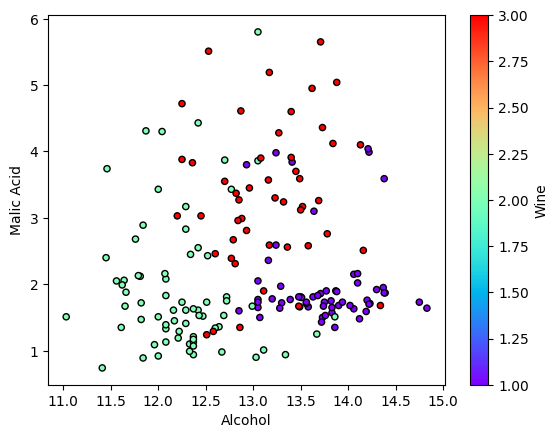

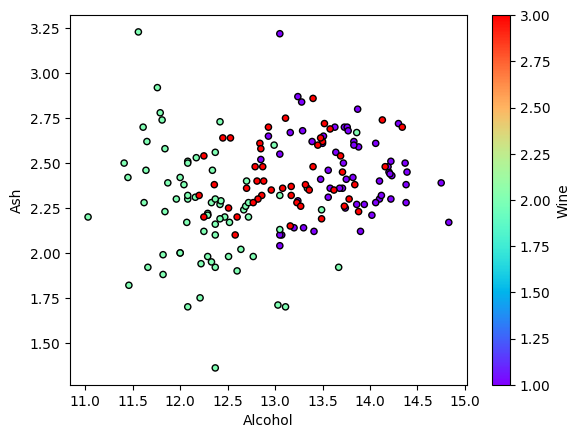

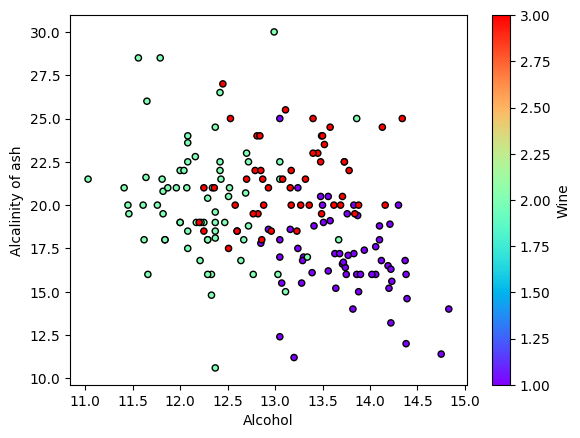

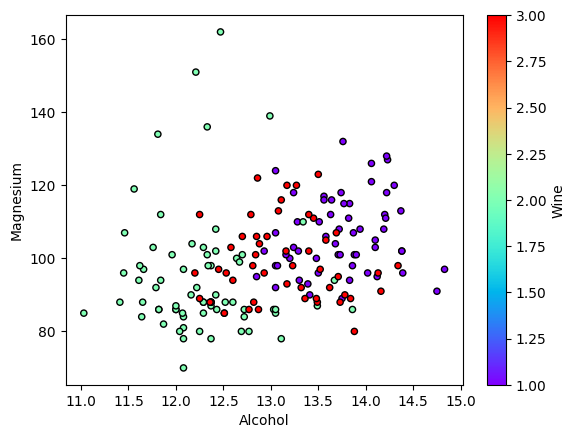

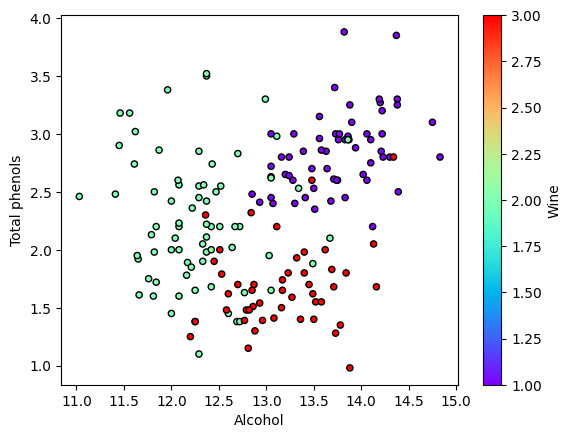

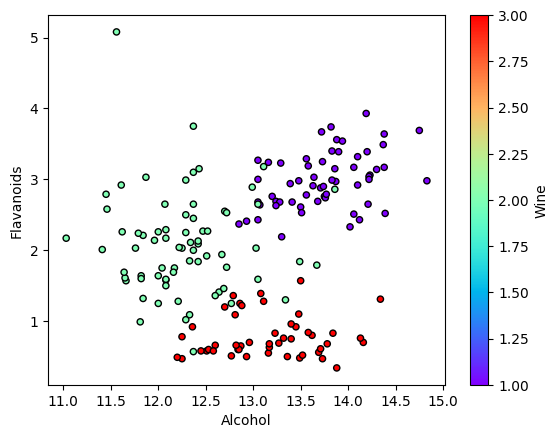

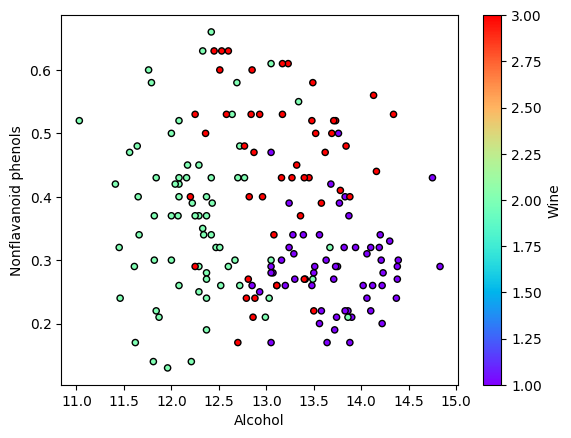

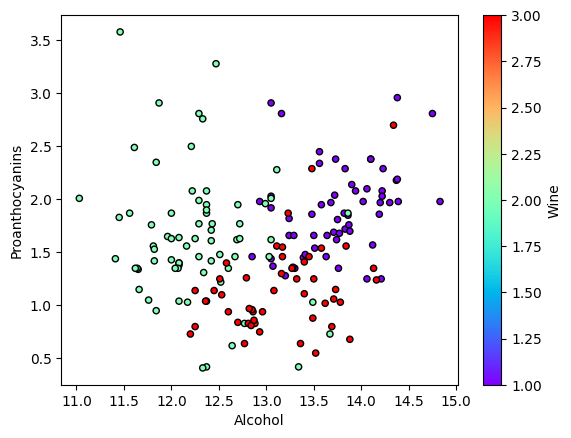

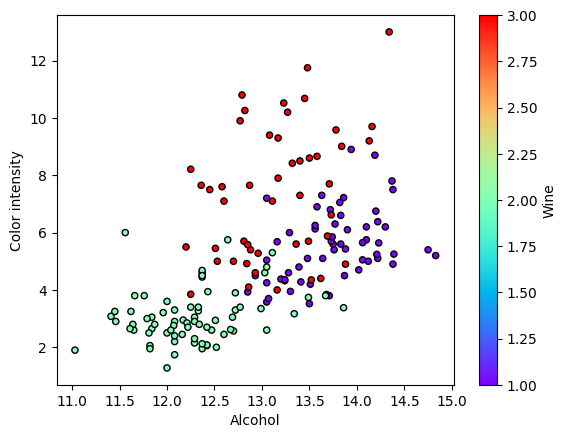

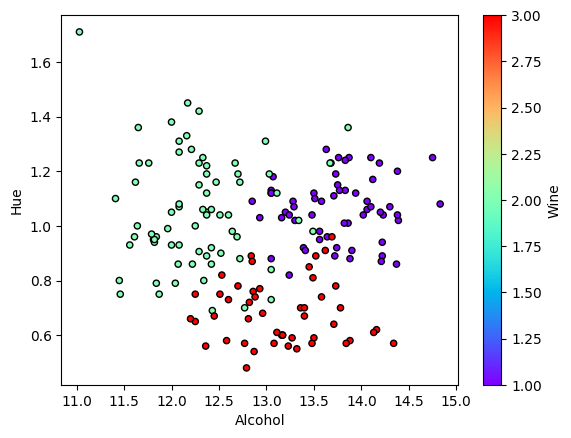

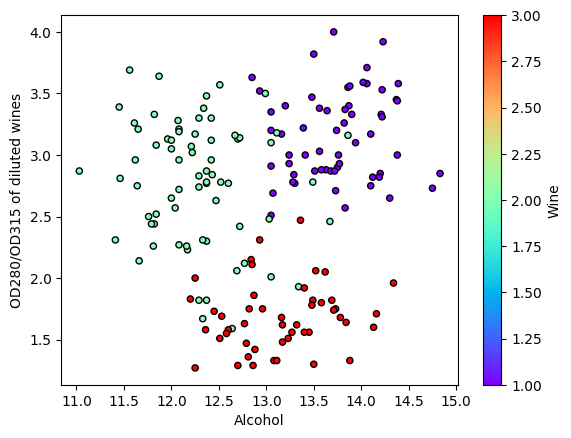

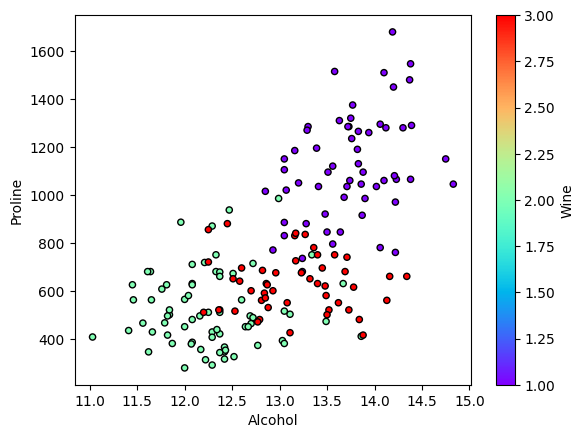

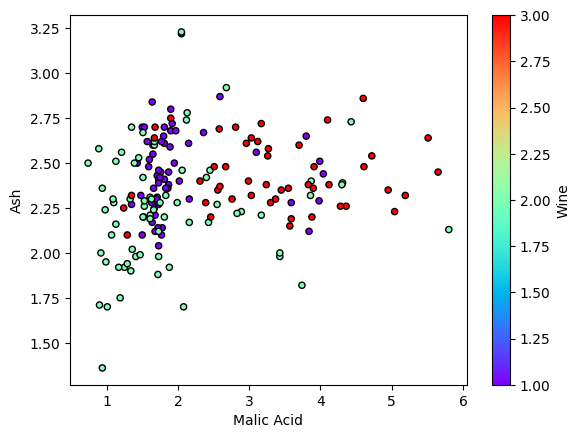

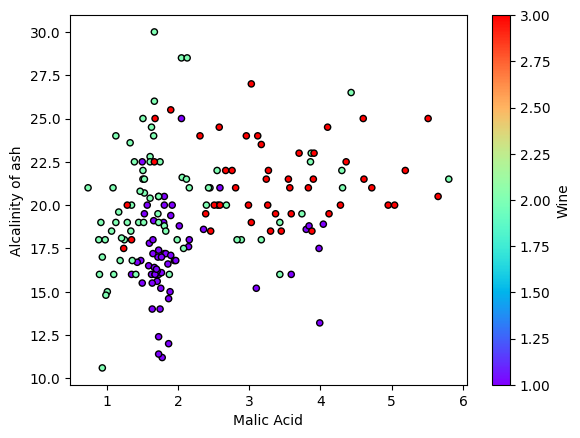

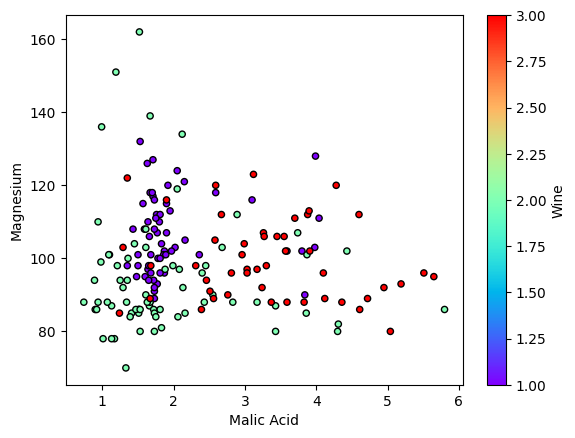

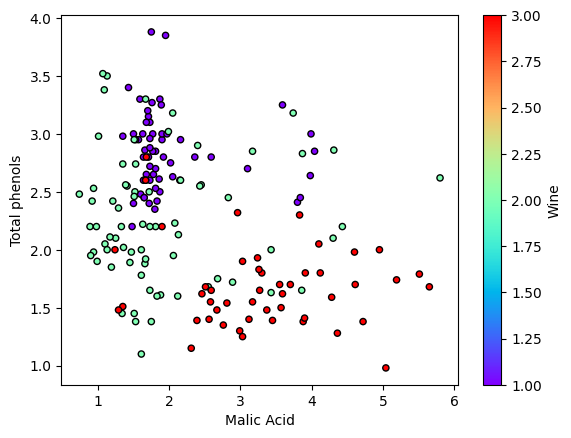

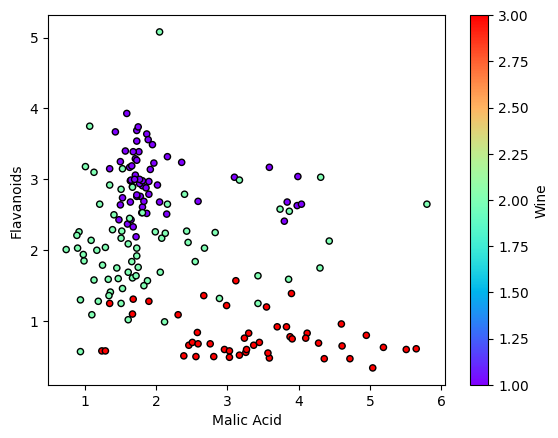

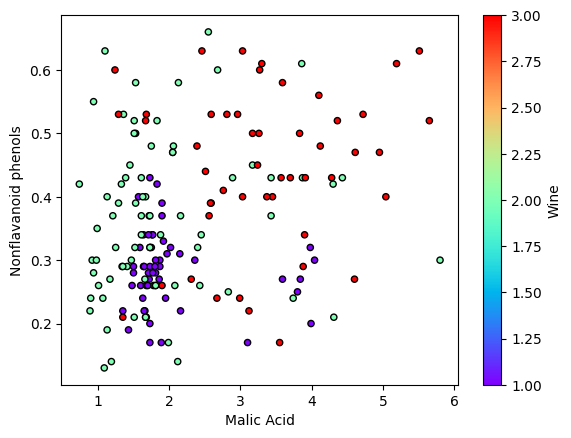

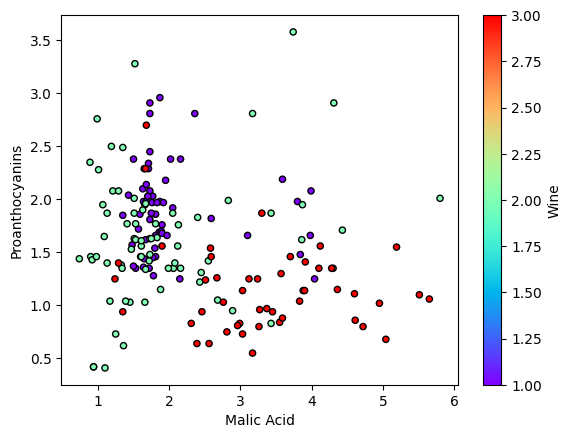

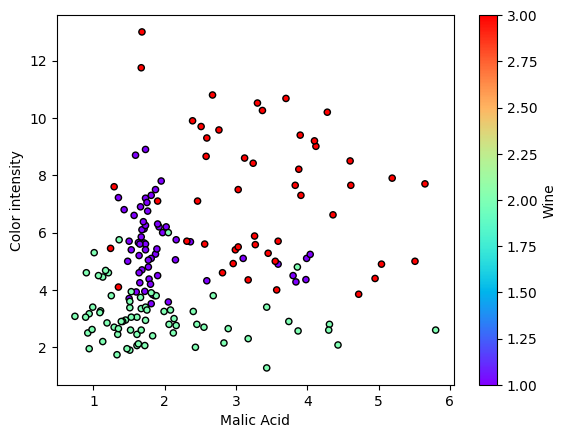

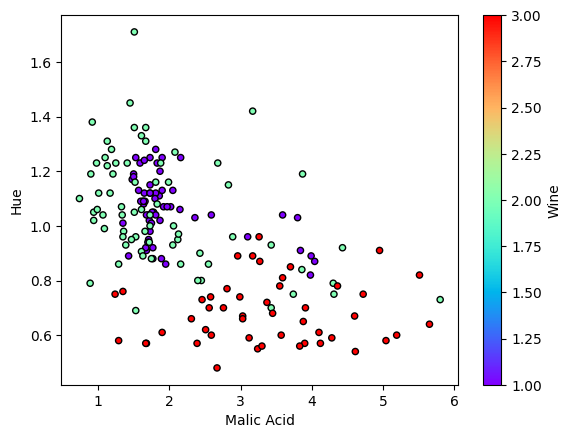

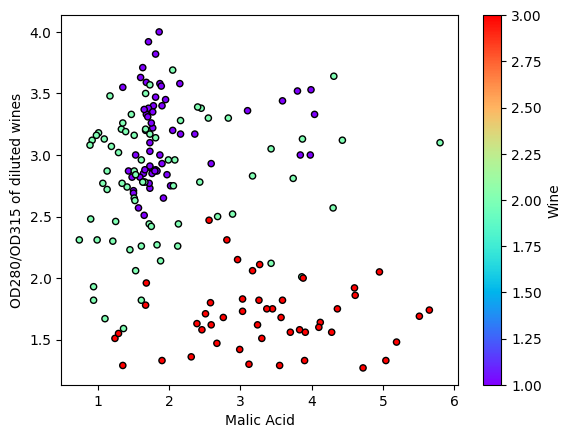

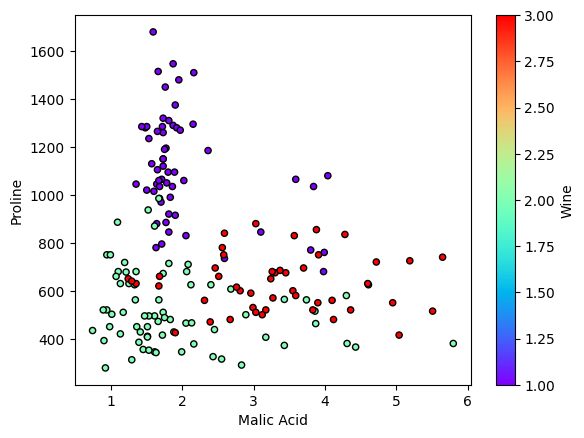

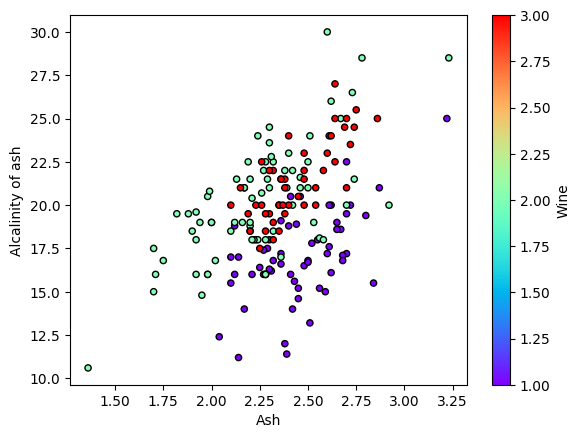

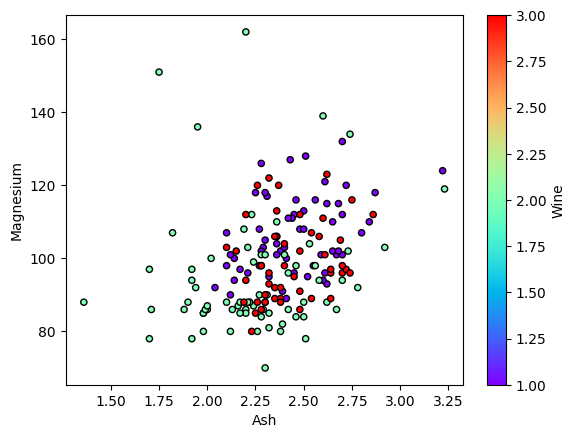

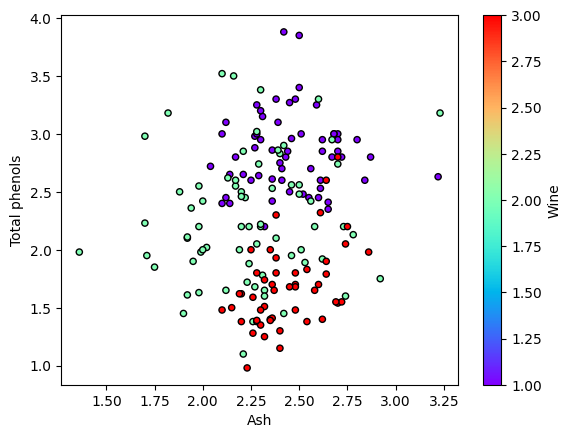

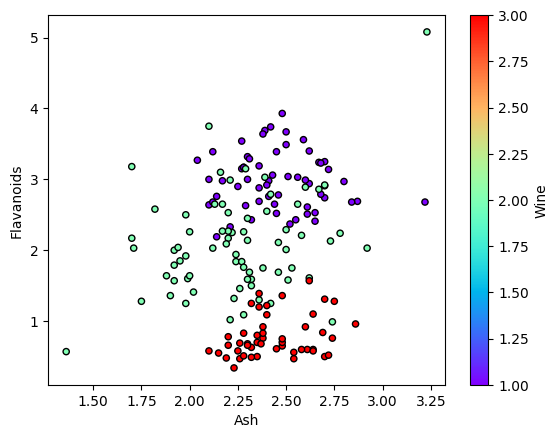

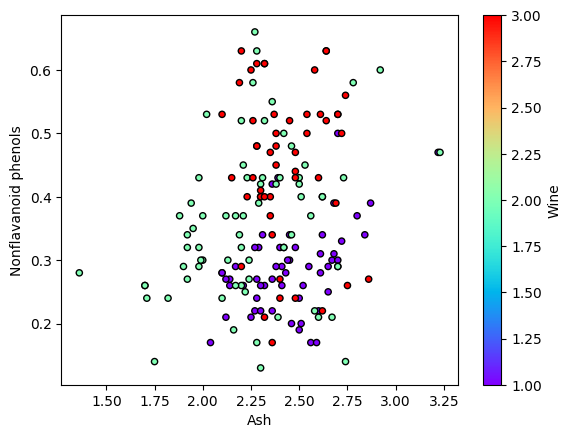

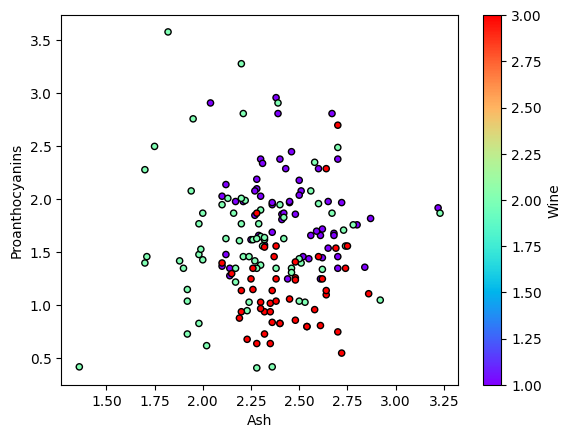

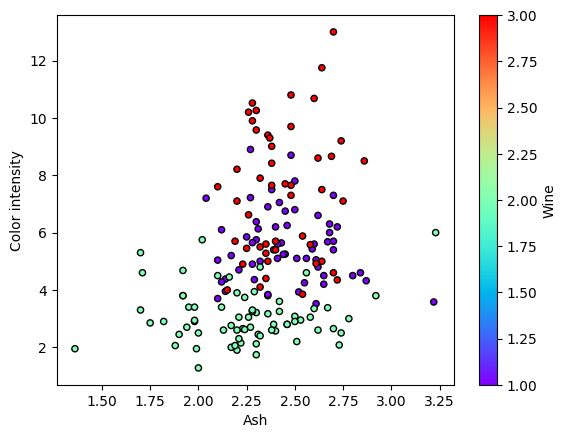

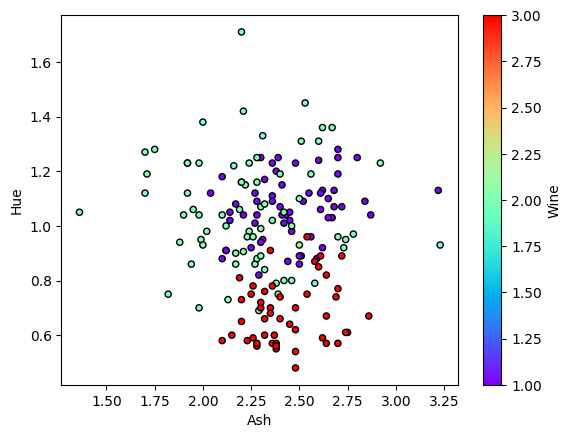

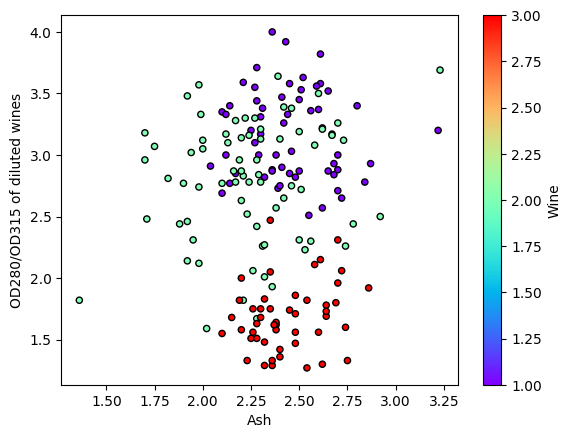

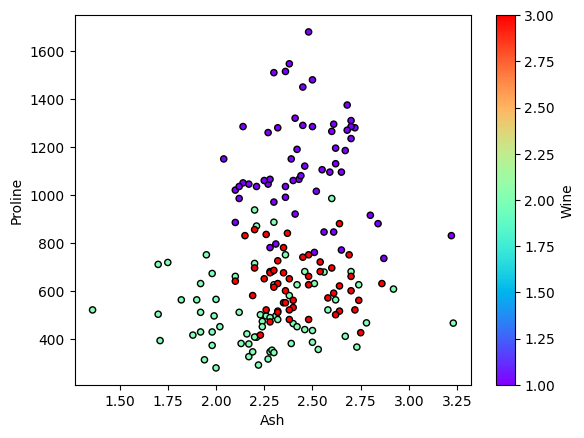

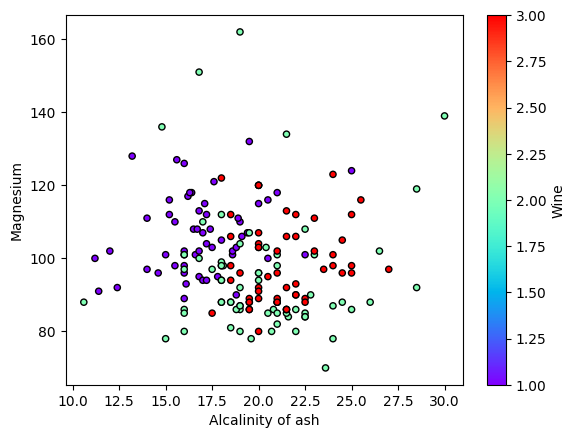

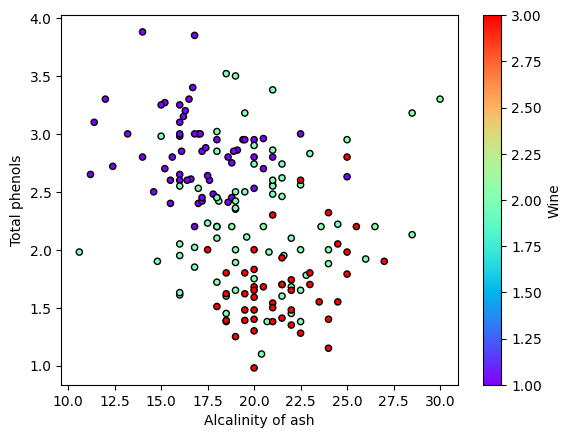

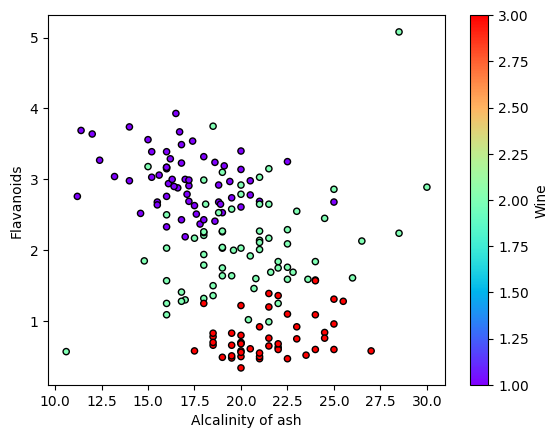

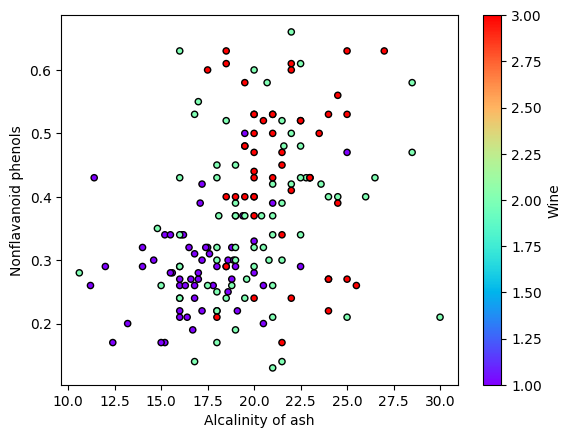

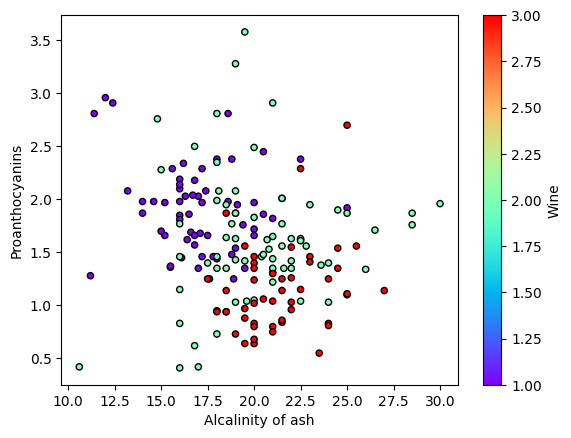

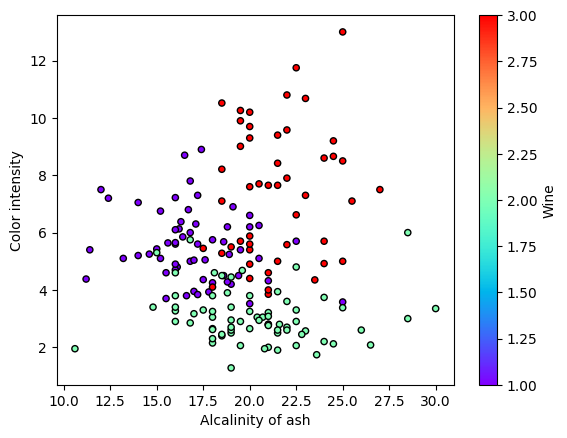

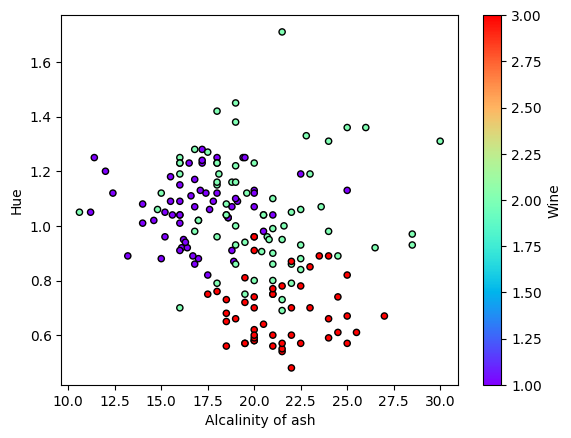

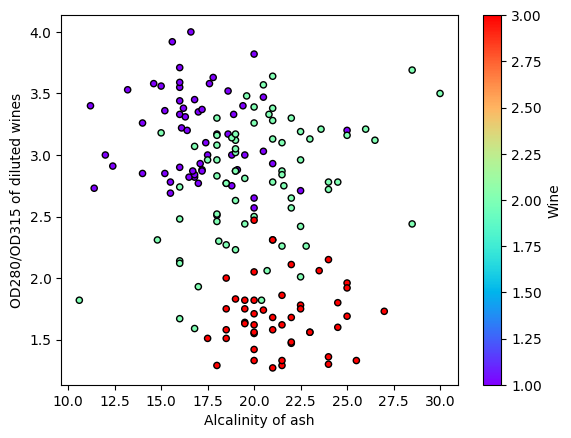

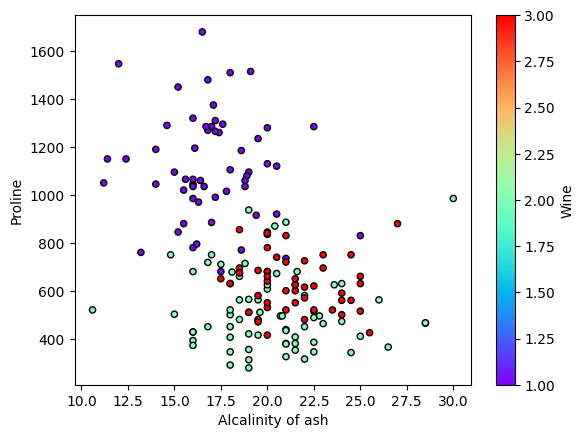

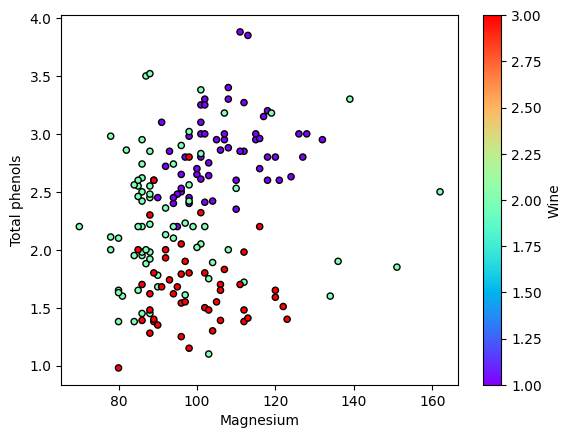

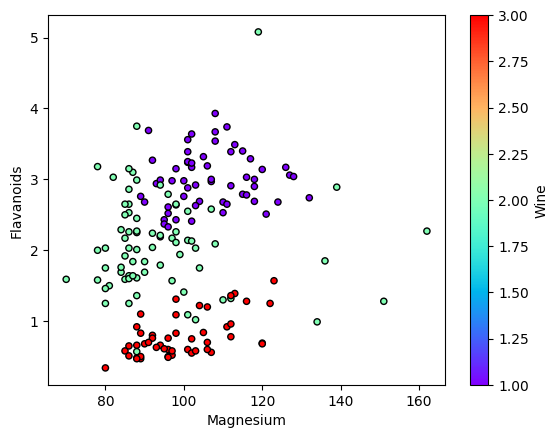

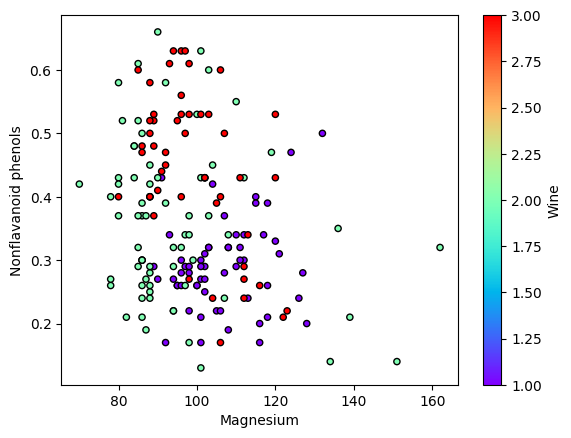

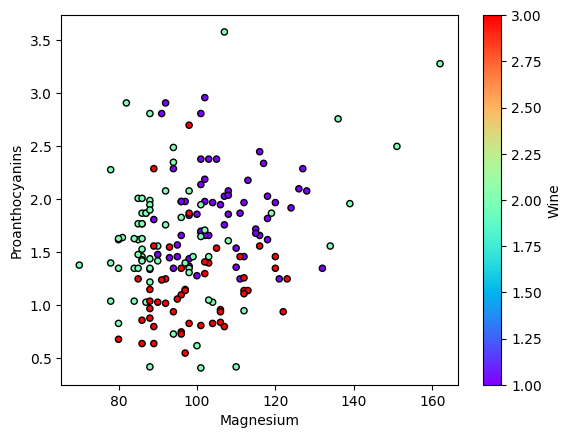

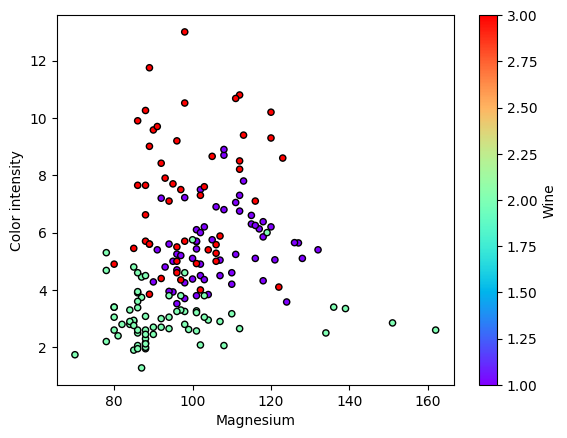

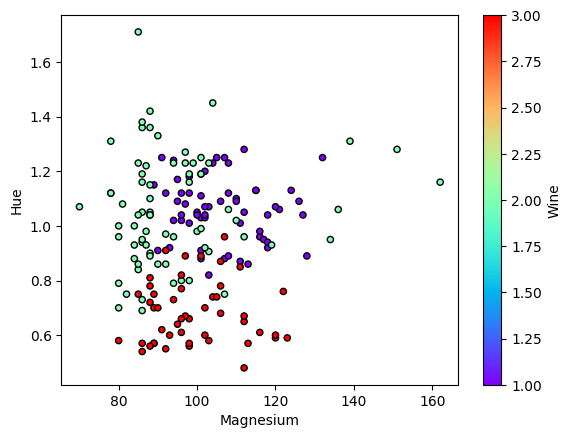

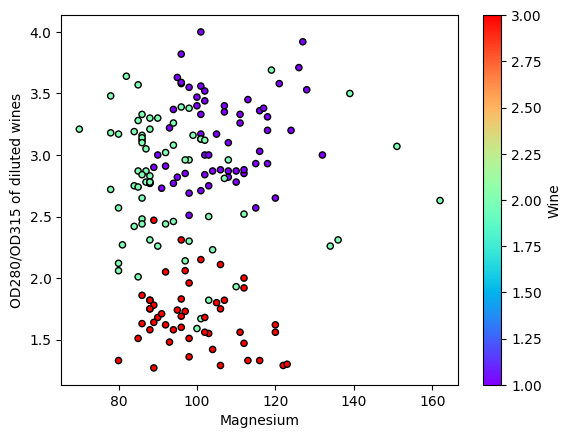

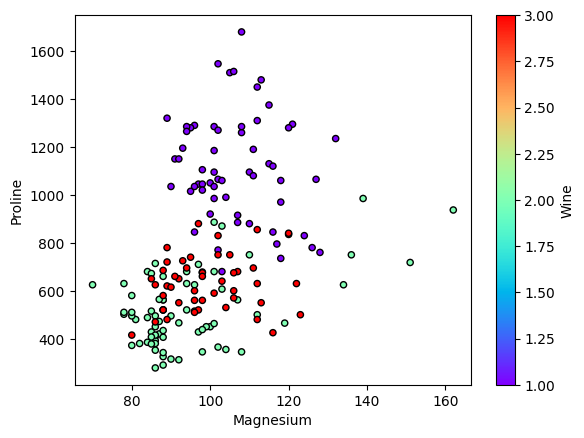

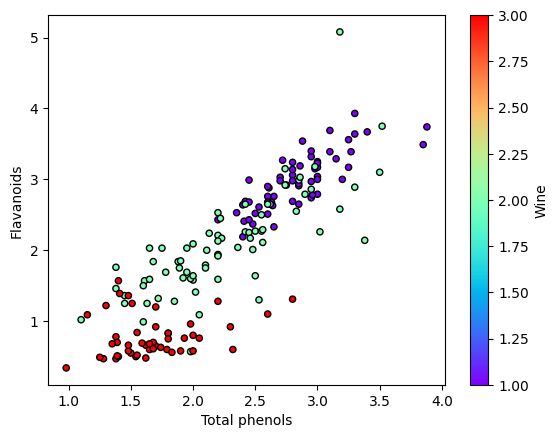

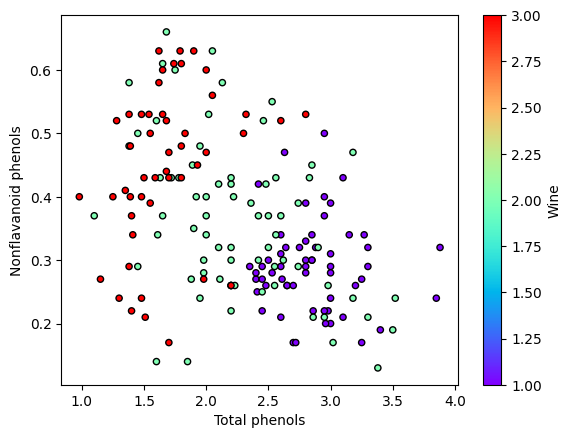

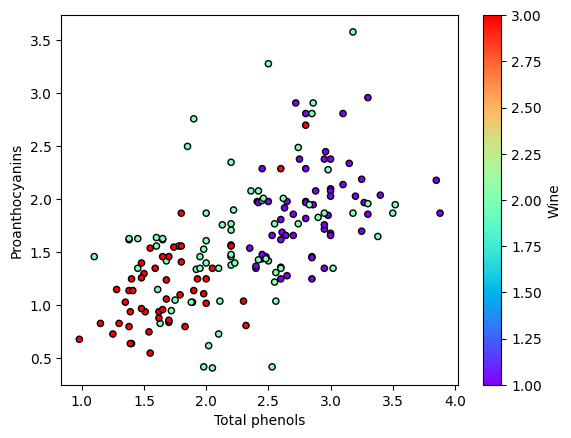

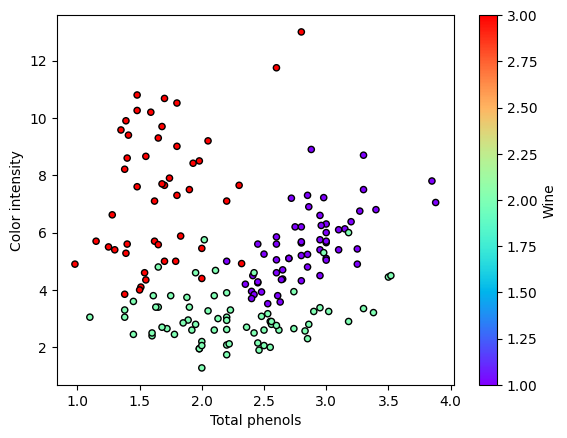

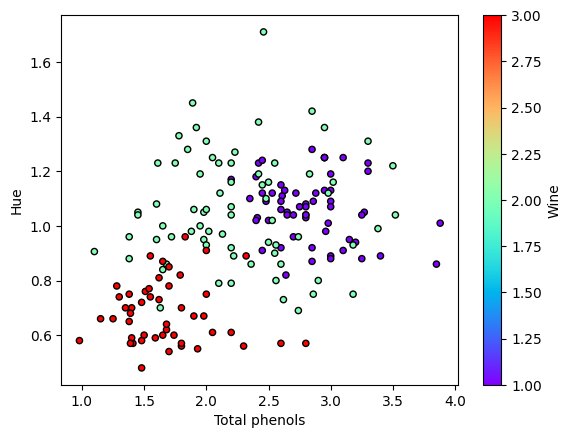

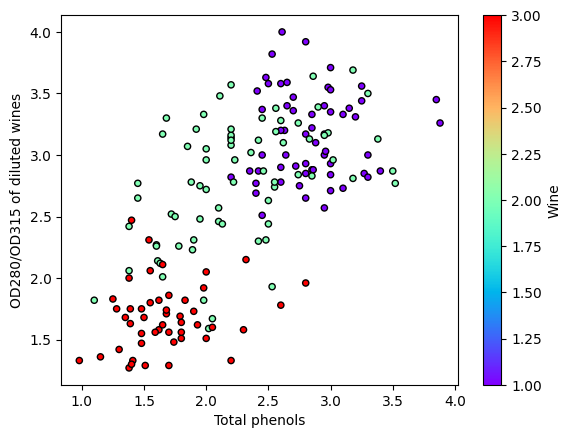

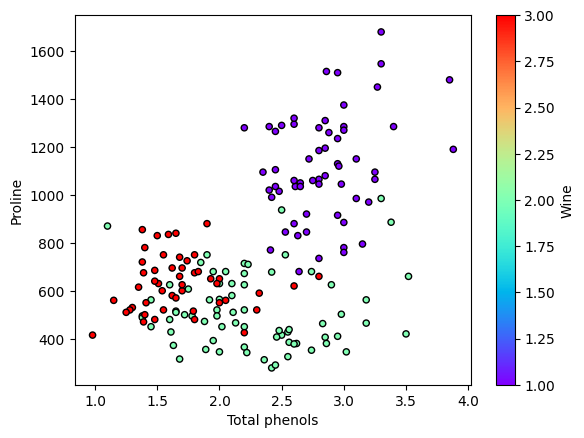

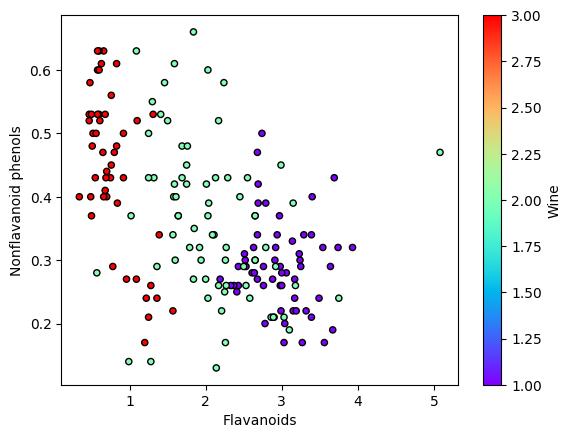

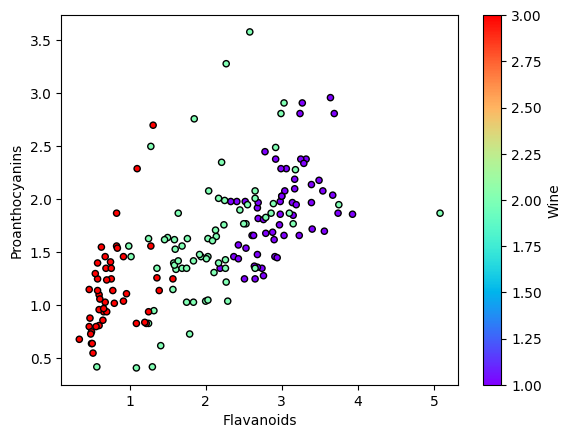

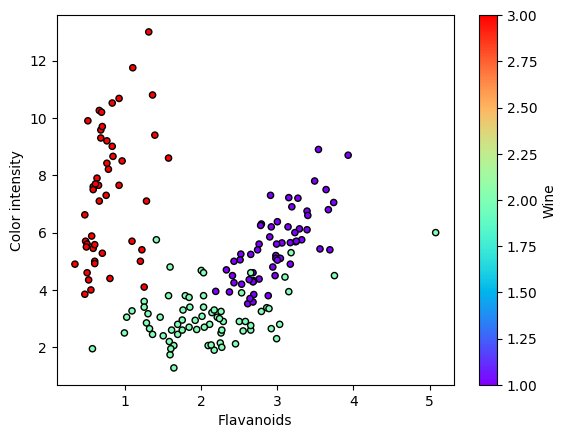

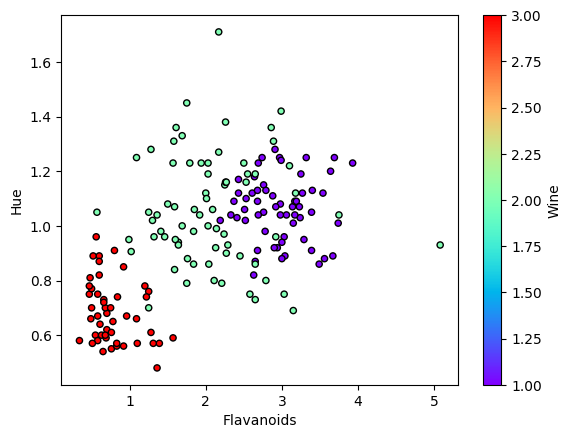

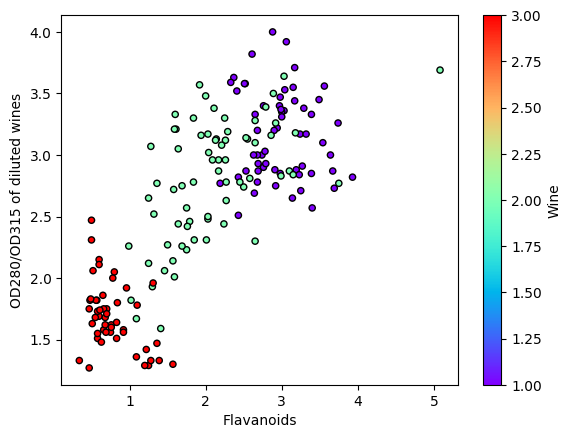

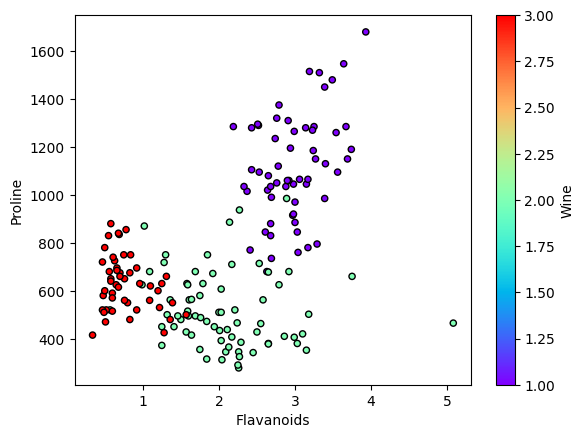

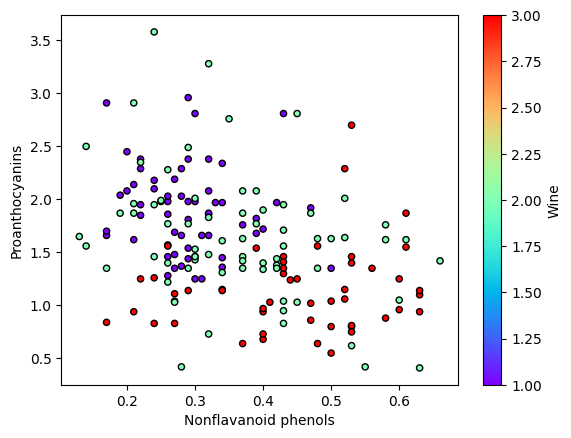

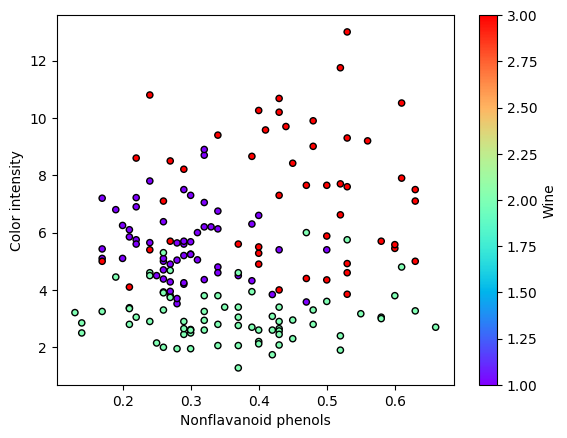

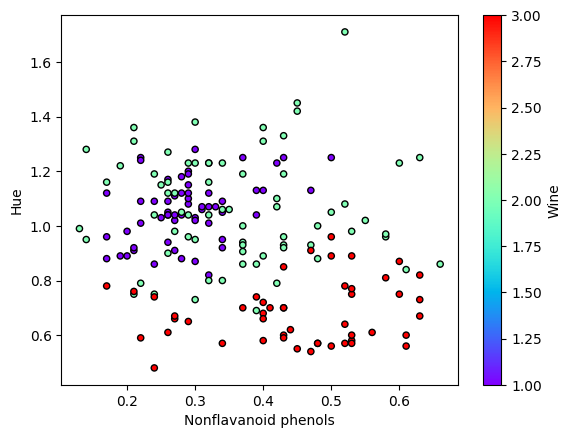

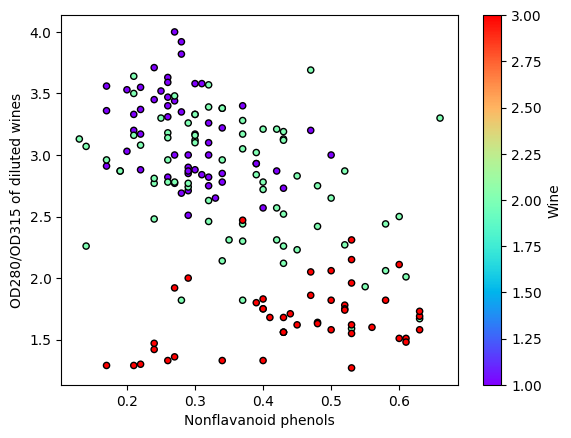

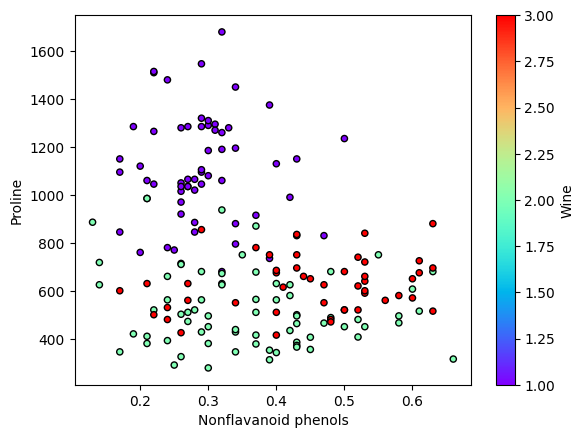

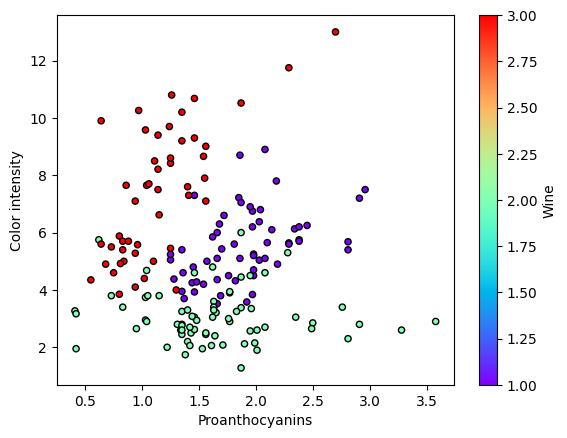

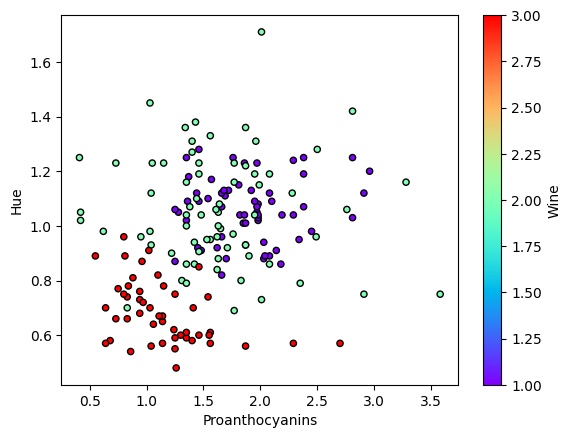

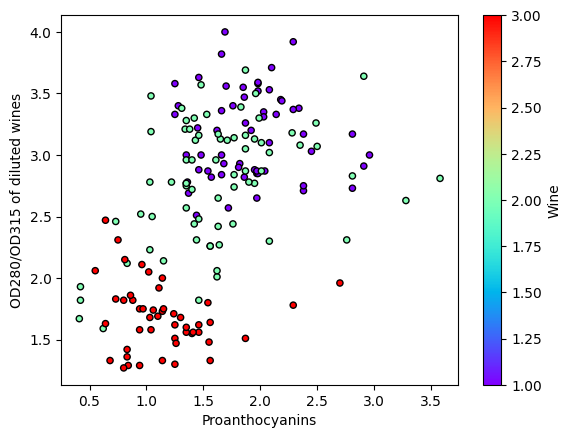

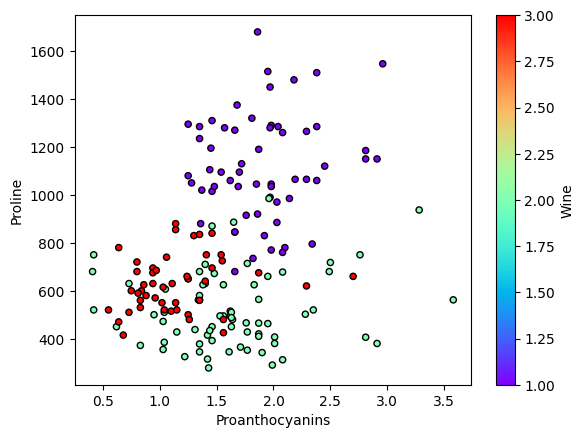

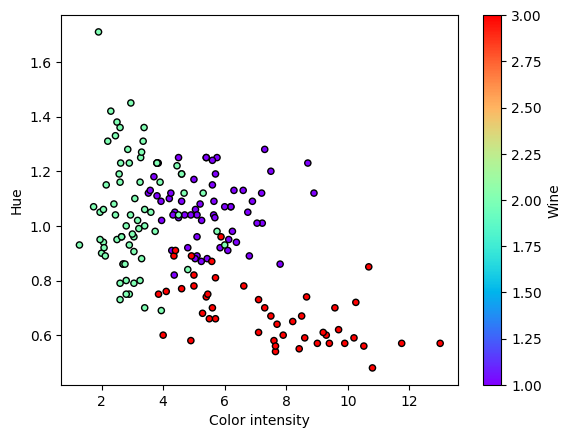

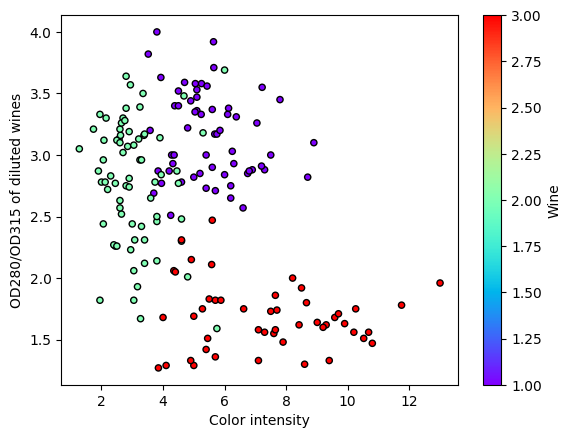

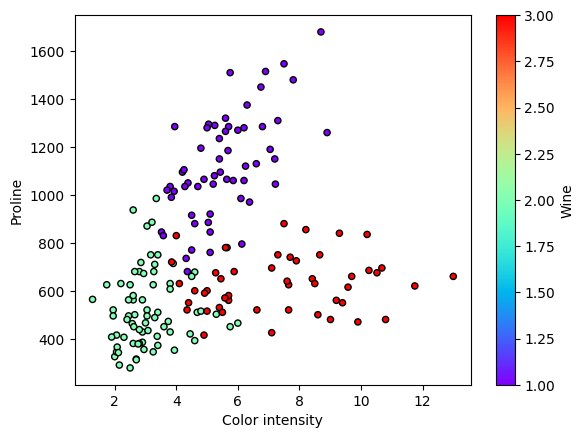

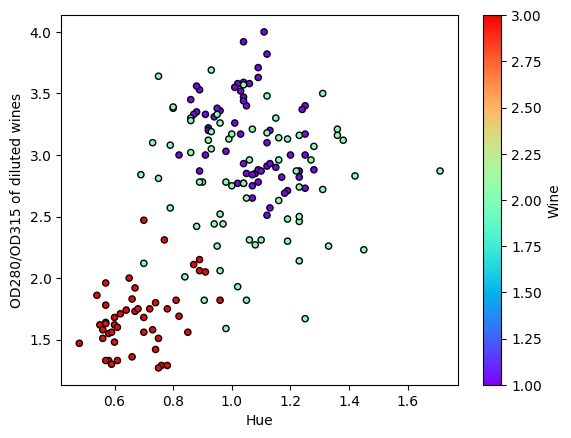

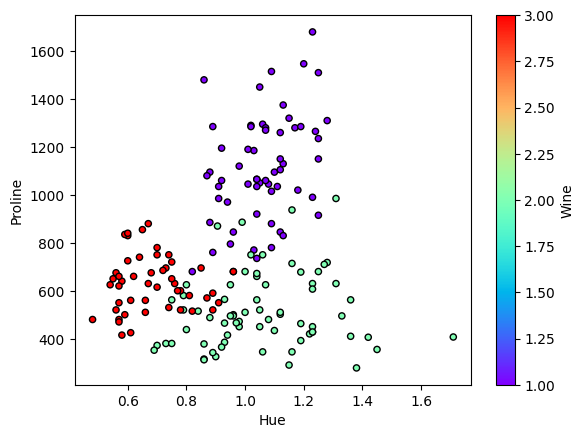

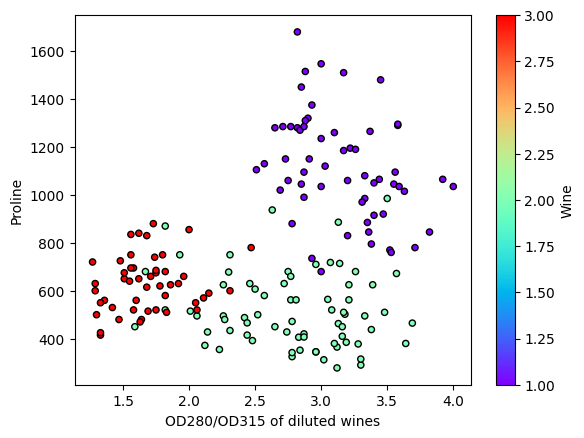

In [252]:
columns = list(X_train.columns)
combinations = itertools.combinations(columns, 2)

for i_column_name, j_column_name in combinations:
    data.plot.scatter(x=i_column_name, y=j_column_name, c='Wine', colormap='rainbow', edgecolor='black');

 Наиболее удачный выбор, по моему мнению -- Alcohol, Proline и Flavanoids

 Отобразим это в 3D

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

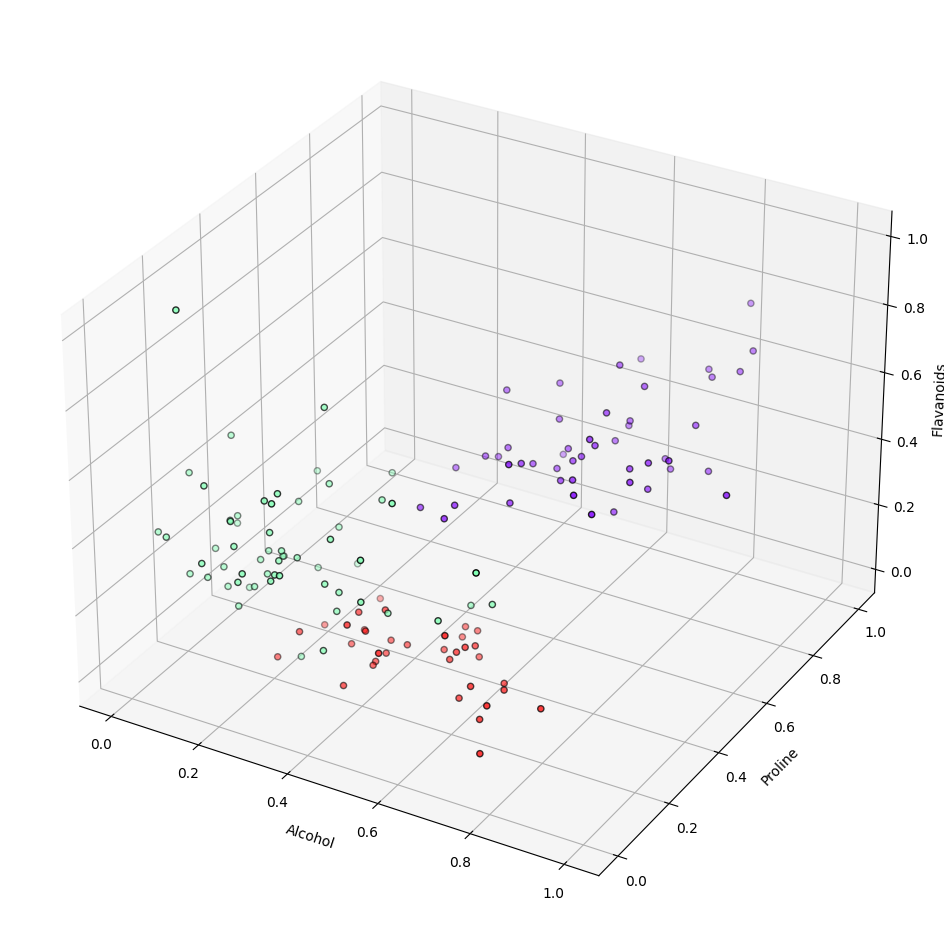

In [253]:
fig = plt.figure(figsize=(13,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train['Alcohol'], X_train['Proline'], X_train['Flavanoids'], c=Y_train, cmap='rainbow', edgecolor='black')

ax.set_xlabel('Alcohol')
ax.set_ylabel('Proline')
ax.set_zlabel('Flavanoids')

plt

### Создание модели

Отбрасывание всех признаков, кроме выбранных

In [254]:
fixed_columns = ['Alcohol', 'Proline', 'Flavanoids']

columns_to_drop = []
for i in columns:
  if i not in fixed_columns:
    columns_to_drop.append(i)

fixed_X_train = X_train.drop(columns_to_drop, axis=1)
fixed_X_test = X_test.drop(columns_to_drop, axis=1)

Создание модели

In [255]:
fixed_model = [fixed_X_train, fixed_X_test, Y_train, Y_test]

Признаки после отбрасывания

In [256]:
fixed_model[0]

Alcohol  Flavanoids   Proline
95   0.309942    0.407173  0.470043
79   0.377193    0.466245  0.131954
65   0.280702    0.487342  0.285307
0    0.824561    0.573840  0.561341
113  0.000000    0.352321  0.111270
..        ...         ...       ...
62   0.660819    0.305907  0.251070
70   0.257310    0.143460  0.422254
6    0.871345    0.459916  0.721826
28   0.719298    0.554852  0.454351
163  0.453216    0.075949  0.283167

[143 rows x 3 columns]

In [257]:
fixed_model[1]

Alcohol  Flavanoids   Proline
149  0.551075    0.274691  0.221698
36   0.604839    0.672840  0.533019
15   0.698925    0.743827  0.938679
60   0.349462    0.182099  0.344340
13   1.000000    0.984568  0.787736
144  0.327957    0.086420  0.509434
64   0.306452    0.385802  0.037736
104  0.397849    0.438272  0.336792
105  0.373656    0.413580  0.000000
19   0.701613    0.780864  0.500000
142  0.669355    0.006173  0.193396
42   0.766129    0.944444  0.735849
25   0.543011    0.672840  0.485849
2    0.572581    0.845679  0.820755
115  0.000000    0.515432  0.086792
134  0.397849    0.024691  0.316038
73   0.526882    0.737654  0.632075
158  0.889785    0.250000  0.325472
168  0.685484    0.104938  0.410377
53   0.736559    0.706790  1.000000
128  0.360215    0.601852  0.025472
153  0.591398    0.101852  0.339623
44   0.543011    0.771605  0.537736
30   0.725806    0.848765  0.915094
52   0.750000    1.000000  0.825472
61   0.432796    0.280864  0.127358
137  0.403226    0.030864  0.188679
140  0.510753    0.000000  0.268868
127  0.204301    0.537037  0.142453
173  0.720430    0.033951  0.400943
101  0.422043    0.265432  0.233019
172  0.841398    0.061728  0.325472
174  0.637097    0.077160  0.410377
120  0.112903    0.706790  0.292453
131  0.497312    0.222222  0.202830

# Оценка моделей

Массив количества соседей

In [258]:
k_values = [3, 14, 30, 100]

Метод для генерации матриц ошибок

In [259]:
def generate_confusion_matrices(model, model_name):
  for k in k_values:
    predicted = predict_all(model[0], model[2], model[1], k)
    expected = Y_test.values
    confusion_matrix = [[0,0,0], [0,0,0], [0,0,0]]

    for i in range(len(expected)):
      if (predicted[i] == expected[i]):
        confusion_matrix[predicted[i] - 1][predicted[i] - 1] += 1
      else:
        confusion_matrix[expected[i] - 1][predicted[i] - 1] += 1

    df_cm = pd.DataFrame(confusion_matrix, index = [1, 2, 3], columns = [1, 2, 3])
    plt.figure(figsize = (10,9))
    sn.heatmap(df_cm, annot=True)

    accuracy = 0

    for i in range(len(confusion_matrix)):
      accuracy += confusion_matrix[i][i]
    accuracy = accuracy / np.sum(confusion_matrix)

    plt.title(f'Модель {model_name}, k = {k}', fontsize=15)
    plt.xlabel(f'Предсказание \n Точность = {round(accuracy * 100, 3)}%', fontsize=15)
    plt.ylabel('Истина', fontsize=15)

    plt.show


## Модель 1 (случайный набор признаков)

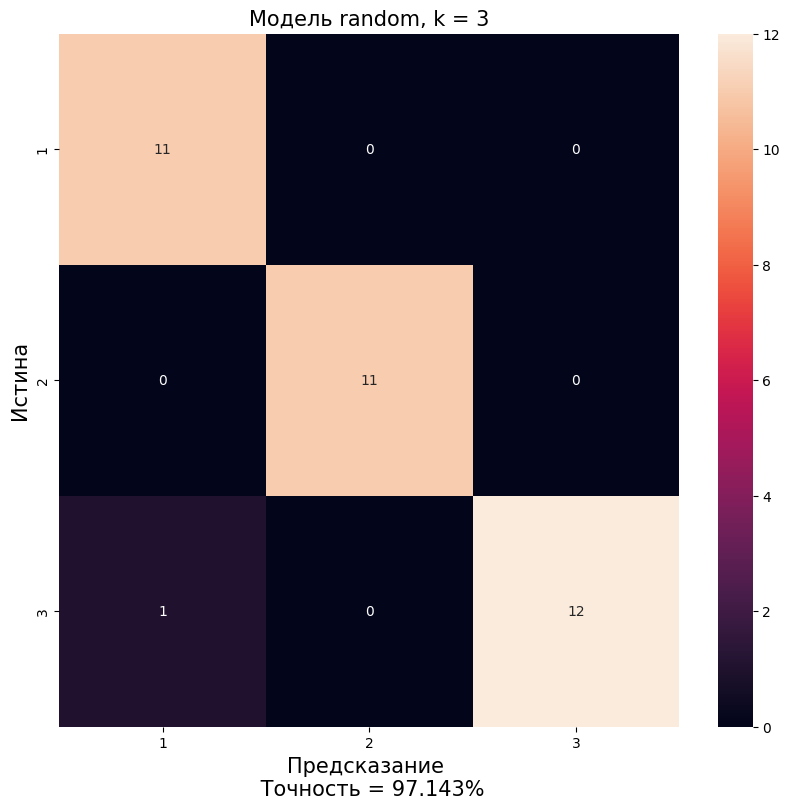

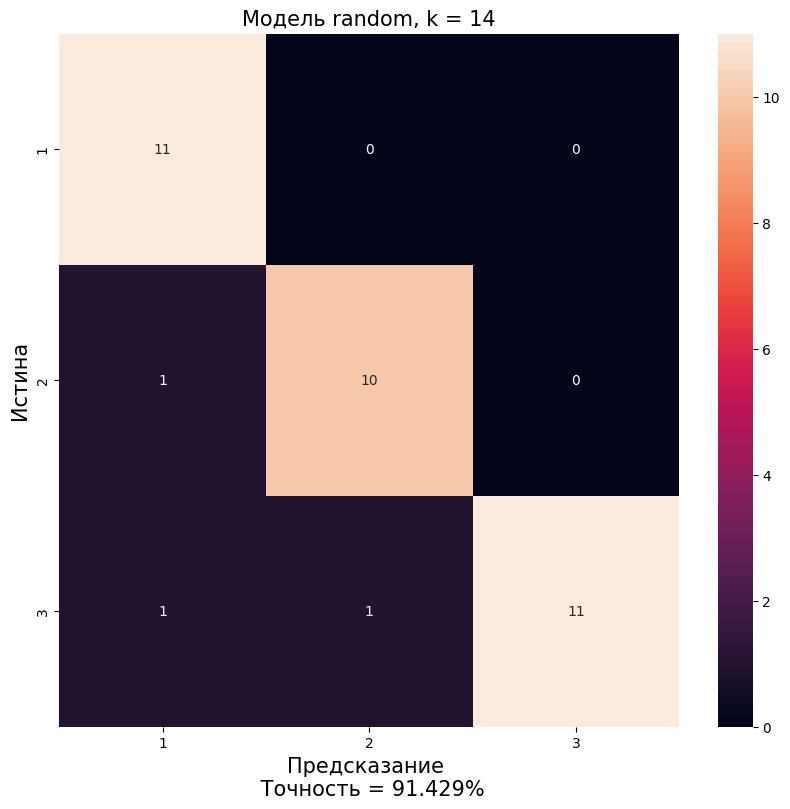

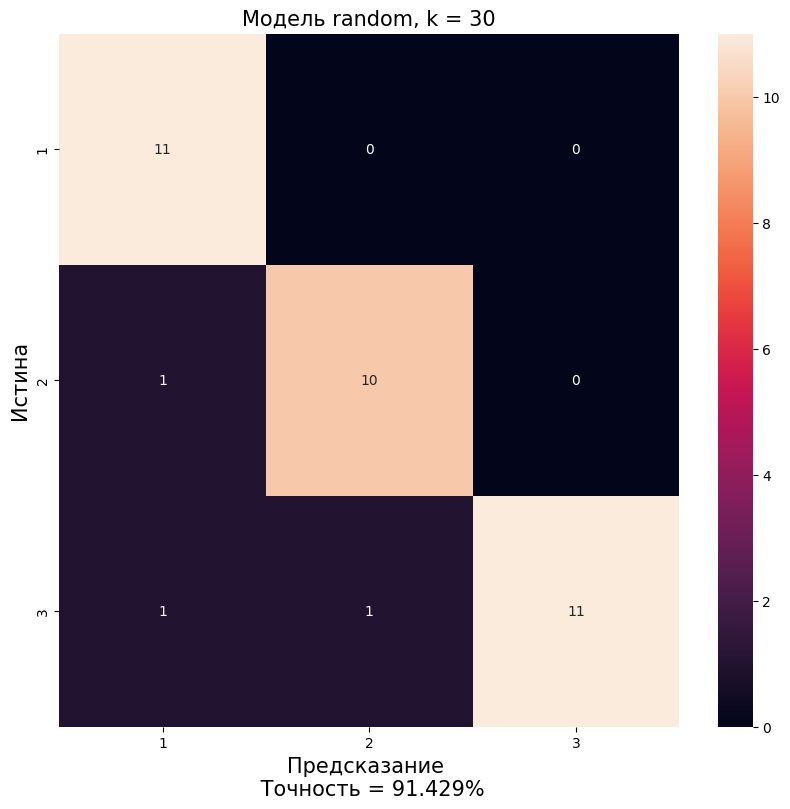

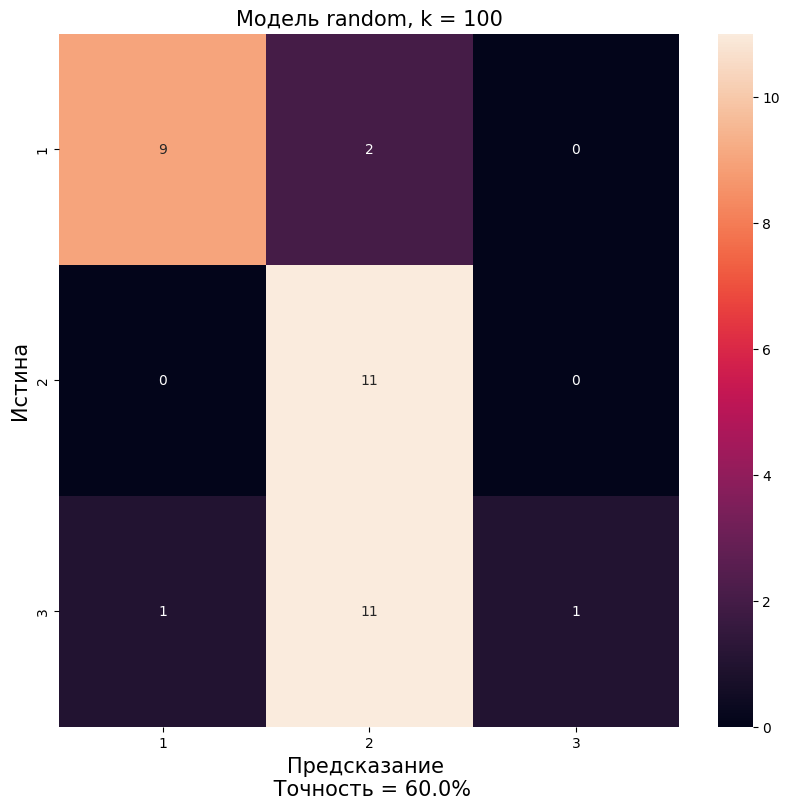

In [260]:
generate_confusion_matrices(random_model, 'random')

## Модель 2 (фиксированный набор признаков)

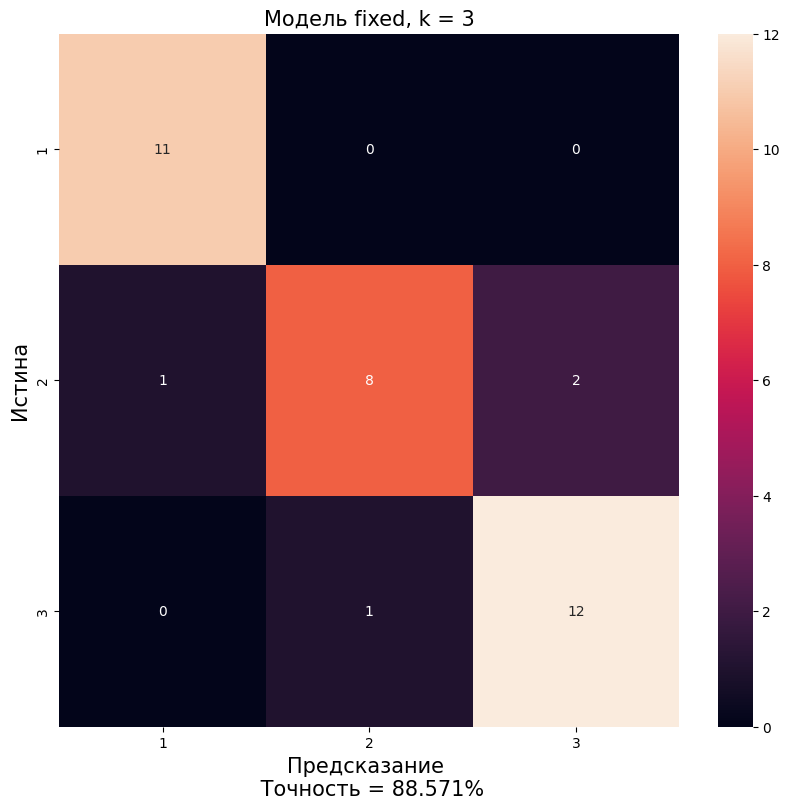

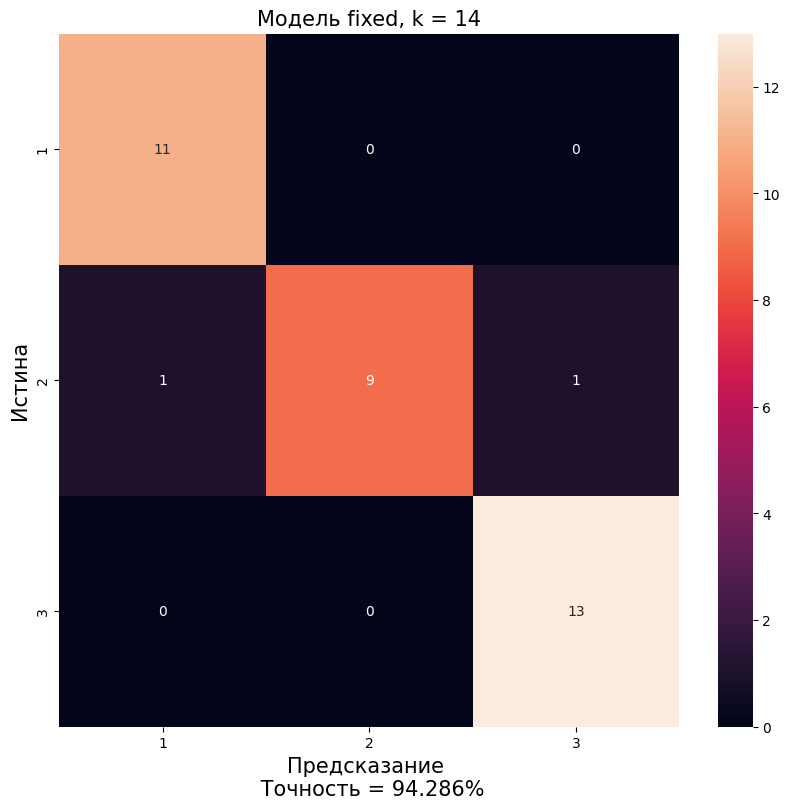

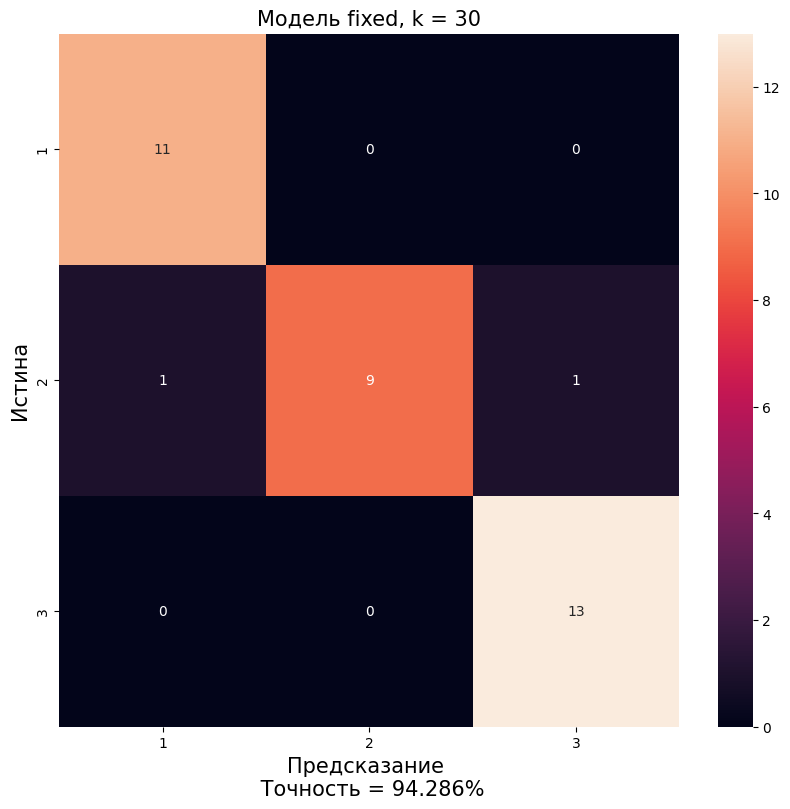

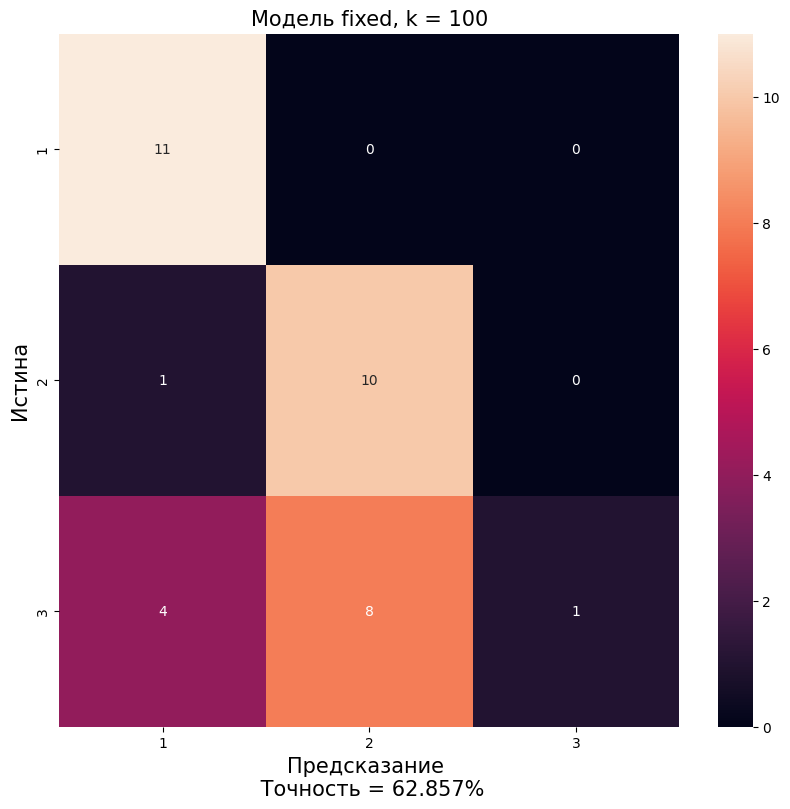

In [261]:
generate_confusion_matrices(fixed_model, 'fixed')